# Heart Disease Prediction
Predicting if a person has a Heart Disease based on his health data using pre-trained Models.

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay 

## Loading the Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

df.shape # checks the rows and columns of the dataframe as (rows, columns)

(303, 14)

In [5]:
# Check the head of our DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualize the Data


### Pairplot

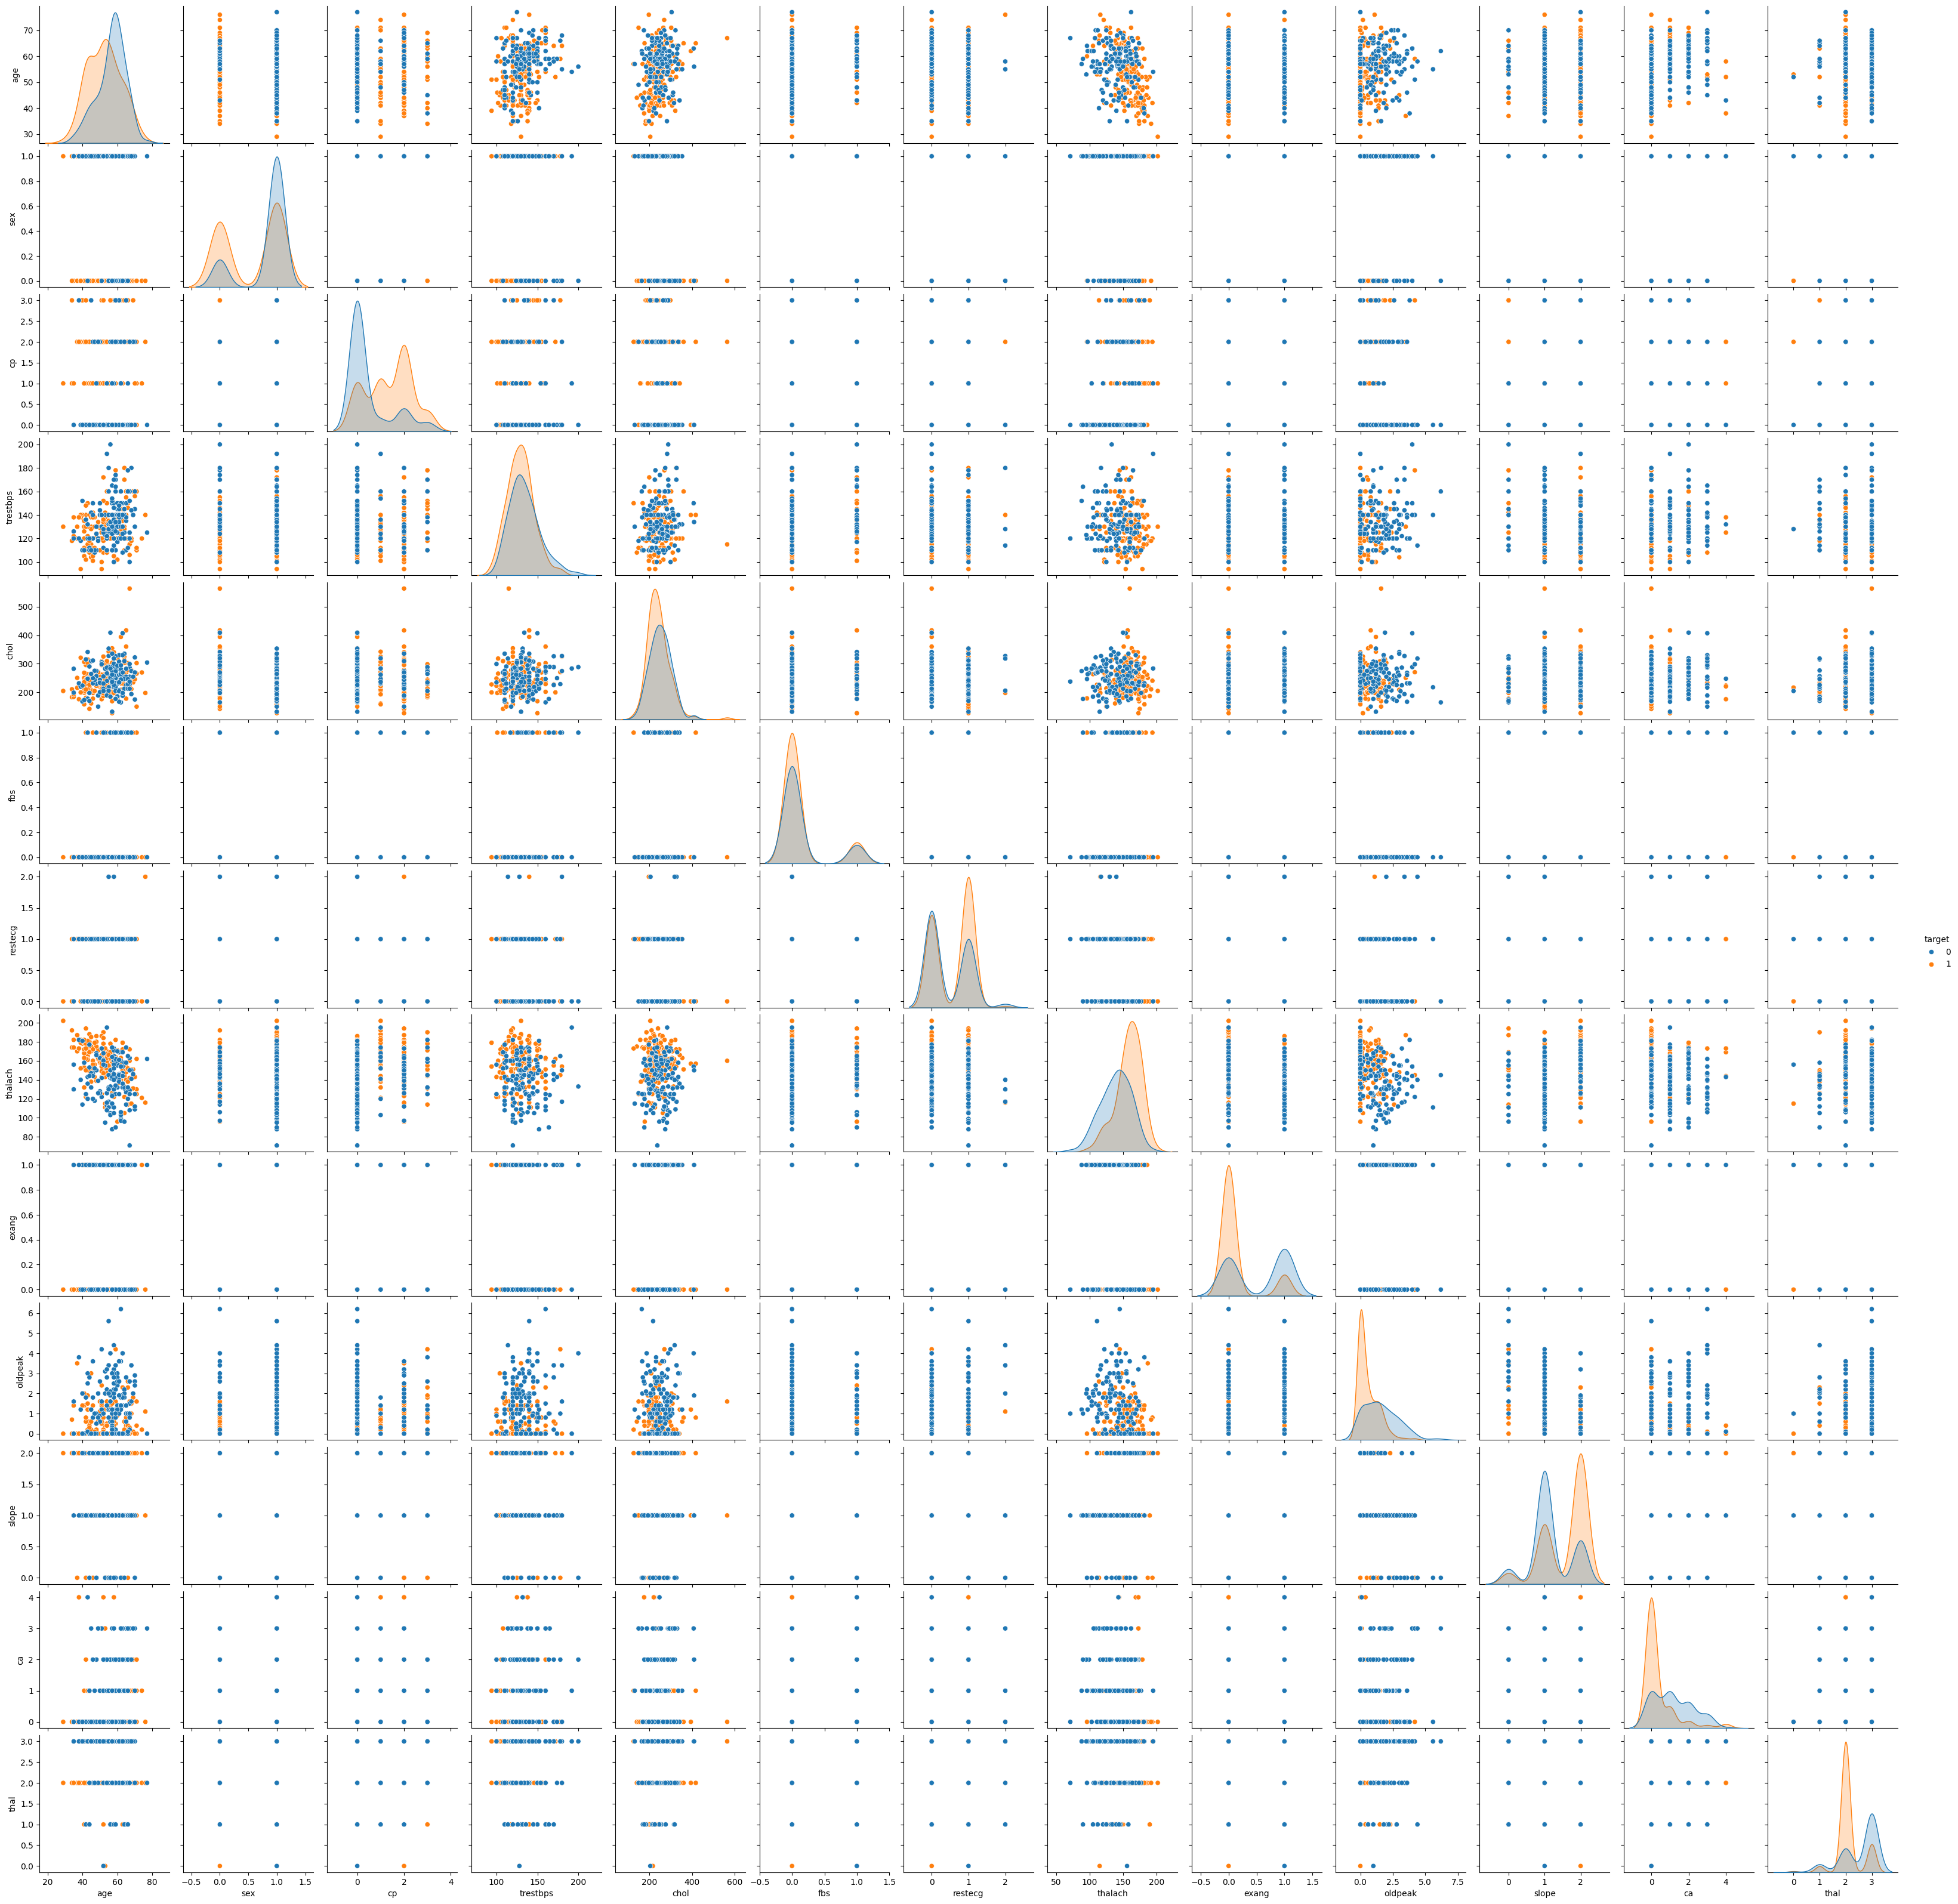

In [9]:
sns.pairplot(df, hue='target')
plt.show()

 thalach and age look promising for prediction, other features need to be combined or engineered for better separation.

### Histogram

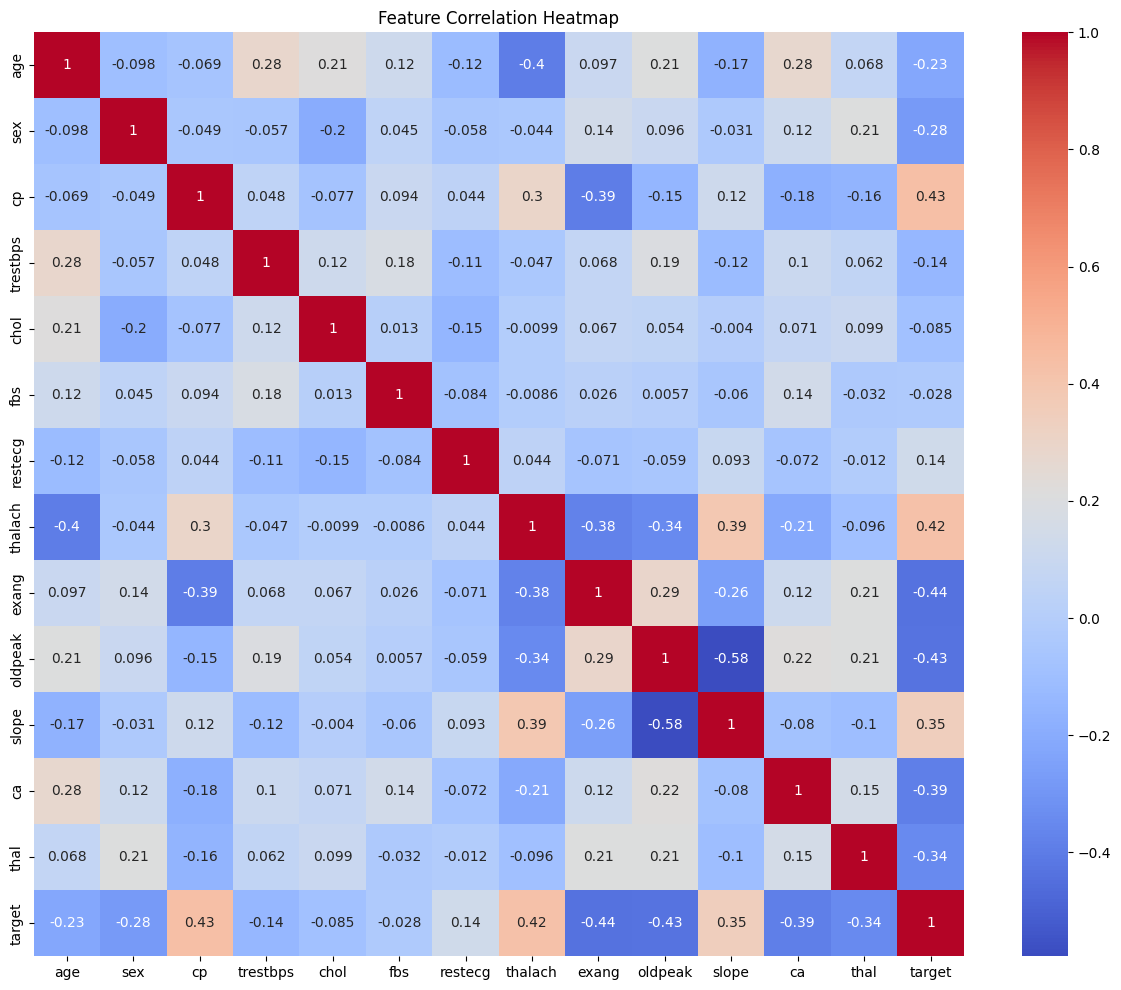

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

This Heatmap tells us that:
- cp (chest pain type) has a strong positive correlation with target. Meaning, certain chest pain types are linked with heart disease.
- thalach (max heart rate achieved) also has a decent positive correlation with target.
- oldpeak has a strong negative correlation, suggesting higher oldpeak values (ST depression induced by exercise) are associated with absence of heart disease.

**Inference:** Chest pain type, max heart rate, and oldpeak are critical features. Features with high correlation to target improve model's predictive power.

## Modelling
We will predict our target variable using all of the other variables by separating the target variable from the rest.

In [16]:
# Everything except target variable
X = df.drop(labels="target", axis=1)

# Target variable
y = df.target.to_numpy()

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
# Targets (in the form of a NumPy array)
y, type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Splitting the Dataset into Training and Testing Datasets

In [19]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

### Training the Model for Prediction

In [ ]:
logreg = LogisticRegression(random_state=16, max_iter=5000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

### Visualizing the matrix

Text(0.5, 427.9555555555555, 'Predicted label')

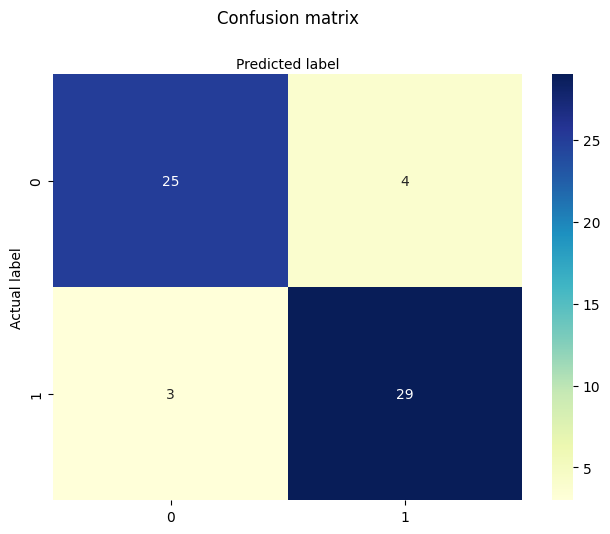

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

- Top-left cell (True Negatives): Correctly predicted no heart disease.
- Bottom-right cell (True Positives): Correctly predicted heart disease.
- Top-right cell (False Positives): Predicted heart disease, but actually healthy (false alarm).
- Bottom-left cell (False Negatives): Missed real heart disease cases, this is dangerous in medical settings!

**Inference:**
- If FN count is low, the model is good at catching actual heart disease cases.
- If FP is high, the model triggers false alarms which is annoying, but sometimes acceptable to reduce missed cases.
- We have to check those counts in your heatmap to know exactly where the model struggles.

### **Confusion matrix evaluation metrics**
We will evaluate the model using classification_report for accuracy, precision, and recall.

In [28]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.89      0.86      0.88        29
   with diabetes       0.88      0.91      0.89        32

        accuracy                           0.89        61
       macro avg       0.89      0.88      0.88        61
    weighted avg       0.89      0.89      0.89        61



These metric tells us that:
**Precision:**  
  - *Without Diabetes:* 89% of people predicted as "without diabetes" were actually correct.  
  - *With Diabetes:* 88% of people predicted as "with diabetes" were actually correct.  
  - High precision means fewer false positives, the model doesn't wrongly label healthy people as diabetic often.  

**Recall (Sensitivity):**  
  - *Without Diabetes:* 86% of actual healthy people were correctly identified.  
  - *With Diabetes:* 91% of actual diabetic people were correctly identified.  
  - High recall for diabetic cases (91%) is crucial, it means the model rarely misses real diabetic cases.  

**F1-Score:**  
  - Harmonic mean of precision and recall, balances both.  
  - F1-scores around **0.88 - 0.89** for both classes indicate the model is consistently reliable across both categories.  

-**Accuracy:**  
  - Overall, **89%** of the predictions are correct.  
  - While accuracy is good, always look at class-wise metrics too, especially in healthcare where recall is critical.  

### ROC curve

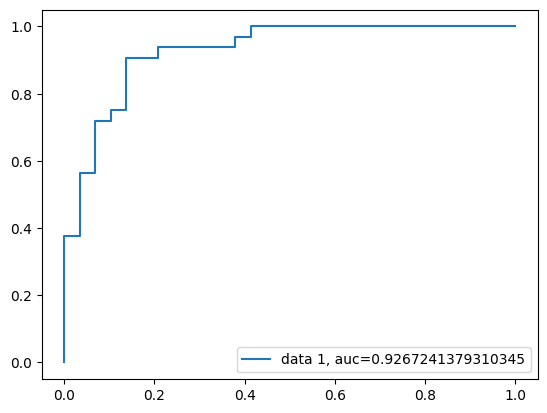

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This model can distinguish between heart disease and no heart disease cases over 92% of the time.
The ROC curve hugs the top-left corner it means:

- High True Positive Rate (TPR) → The model correctly catches most patients with heart disease.

- Low False Positive Rate (FPR) → The model doesn't wrongly predict too many healthy people as sick.